<br>

####   hw5pr3owndata_cleaner
+ clasification or regression of via decision trees and random forests of your own dataset...
+ [here is the assignment page](https://docs.google.com/document/d/1oLNNM8jfWdG3xXvmRojXLgDWE-mFNgQUsohZ4dmfPV0/edit)
+ [here is the hw5 page, specifically](https://docs.google.com/document/d/1l82PGTqIQkFJAGRCv0hxa2ifccM0YFzIYRzsBib2dAM/edit)


In [ ]:
#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the week5 iris- + births + digits + titanic-cleaning notebooks into here +++
#     Also, feel free to "pre-clean" using spreadsheet or other tools...
#     Or, if you've chosen an already-tidy dataset, wonderful!

#
# Note that if your dataset is HUGE, probably better to choose a subset for this small project
#     Then, use the whole dataset for a final project, if you'd like.


In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [2]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'stock_prices.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

stock_prices.csv : file read into a pandas dataframe.


In [3]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
# let's view it!
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [4]:
#
# let's look at the dataframe's "info":
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
RowId               object
Date                object
SecuritiesCode      int64
Open                float64
High                float64
Low                 float64
Close               float64
Volume              int64
AdjustmentFactor    float64
ExpectedDividend    float64
SupervisionFlag     bool
Target              float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [5]:
# Let's look at the dataframe's columns:
df.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')

In [6]:
# we can drop a series of data (a row or a column)
# they're indicated by numeric value, row~0, col~1, but let's use readable names instead:
ROW = 0
COLUMN = 1

df_clean1 = df.drop(['RowId', 'Date', 'SecuritiesCode', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'], axis=COLUMN)
df_clean1

# df_clean1 is a new dataframe, without that unwanted column

,Open,High,Low,Close,Volume,Target
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730
1,568.0,576.0,563.0,571.0,2798500,0.012324
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026
...,...,...,...,...,...,...
2332526,514.0,528.0,513.0,528.0,44200,0.034816
2332527,782.0,794.0,782.0,794.0,35900,0.025478
2332528,1690.0,1690.0,1645.0,1645.0,7200,-0.004302
2332529,2388.0,2396.0,2380.0,2389.0,6500,0.009098


In [7]:
#
# let's drop _all_ rows with data that is missing/NaN (not-a-number)
df_clean2 = df_clean1.dropna()
df_clean2.info()  # print the info, and

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324923 entries, 0 to 2332530
Data columns (total 6 columns):
Open      float64
High      float64
Low       float64
Close     float64
Volume    int64
Target    float64
dtypes: float64(5), int64(1)
memory usage: 124.2 MB


In [8]:
# Covert target to two category
# Positive and Negative

def convert_rate(rate):
    """ return the positive to nagative  """
    #print(f"converting {speciesname}...")
    if rate >= 0:
        return 1
    else: return 0

In [10]:
#
# we can "apply" to a whole column and create a new column
#   it may give a warning, but this is ok...
#

df_clean3 = df_clean2.copy()  # copy everything AND...

# add a new column, 'irisnum'
df_clean3['targetdir'] = df_clean3['Target'].apply(convert_rate)

# let's see...
df_clean3

,Open,High,Low,Close,Volume,Target,targetdir
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,1
1,568.0,576.0,563.0,571.0,2798500,0.012324,1
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,1
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,1
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,1
...,...,...,...,...,...,...,...
2332526,514.0,528.0,513.0,528.0,44200,0.034816,1
2332527,782.0,794.0,782.0,794.0,35900,0.025478,1
2332528,1690.0,1690.0,1645.0,1645.0,7200,-0.004302,0
2332529,2388.0,2396.0,2380.0,2389.0,6500,0.009098,1


In [11]:
#
# let's call it df_tidy 
#
df_tidy =  df_clean3

In [12]:
#
# That's it!  Then, and write it out to iris_cleaned.csv

# We'll construct the new filename:
cleaned_filename = "stock_prices_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_tidy.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is stock_prices_cleaned.csv


<br>

#### Visualizing some facet of the data
+ be sure to include _some_ visualization of the dataset, either here or in the modeler
+ and compute the feature_importances (it's not necessary to visualize those: they may or may not add insight)

<AxesSubplot:>

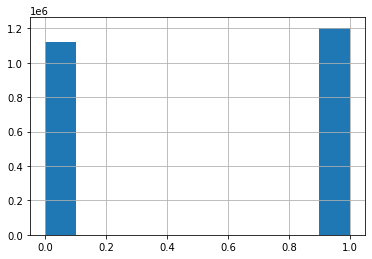

In [17]:
df_tidy.targetdir.hist()